<a href="https://colab.research.google.com/github/Dnsflr/Ekonometria-projekt/blob/main/calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekcik tutaj będzie

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns

In [5]:
file_path = "Baza_Ekonometria (2).xlsx"

df_2014 = pd.read_excel(file_path, sheet_name='2014')
df_2018 = pd.read_excel(file_path, sheet_name='2018')
df_2022 = pd.read_excel(file_path, sheet_name='2022')

quasi stałe

In [6]:
from sklearn.feature_selection import VarianceThreshold

X = df_2014.drop(columns='Nazwa')
# Próg np. 0.01 oznacza, że zmienna musi mieć co najmniej 1% zmienności
selector = VarianceThreshold(threshold=0.001)

# Zakładamy, że X to tylko cechy numeryczne
X_reduced = selector.fit_transform(X)

# Jeśli chcesz zachować kolumny
X_reduced_df = X.loc[:, selector.get_support()]
X_reduced_df

,Odsetek_Studentów,Odsetek_studentów_medyczne,Odsetek_pielegniarek,Absolwenci_10_tys,Odsetek_absolwentow,Badacze
0,0.441109,0.071946,0.095939,58.326460,0.397967,5.5
1,0.345478,0.117980,0.171565,40.885324,0.322054,2.9
2,0.415311,0.148065,0.131611,55.434861,0.398738,3.7
3,0.279585,0.028258,0.076037,19.670550,0.368704,1.8
4,0.392952,0.118249,0.106175,44.354620,0.325650,4.2
5,0.396227,0.066637,0.126458,70.476936,0.368521,8.9
6,0.332261,0.062632,0.111105,68.549863,0.272272,10.6
7,0.359234,0.098759,0.047934,42.573472,0.315614,2.2
8,0.431891,0.091391,0.122377,35.285769,0.340334,4.7
9,0.438914,0.150720,0.189300,43.778179,0.421798,2.8


## Wstępna analiza danych

### PODSTAWOWE STASTYTYKI OPISOWE

In [7]:
df_2014.describe()

,Odsetek_Studentów,Odsetek_studentów_medyczne,Zdawalnosc_matur,Odsetek_pielegniarek,Absolwenci_10_tys,Odsetek_absolwentow,Odsetek_madrali,Badacze
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.388515,0.091948,0.706875,0.116422,44.908091,0.348368,0.004491,4.181250
std,0.056560,0.034183,0.017783,0.036599,13.549037,0.049441,0.001355,2.492447
min,0.279585,0.028258,0.670000,0.047934,19.670550,0.242664,0.001967,1.800000
25%,0.355795,0.070618,0.700000,0.101236,35.183710,0.320444,0.003518,2.400000
50%,0.394589,0.095075,0.710000,0.116649,43.175826,0.348510,0.004318,3.500000
75%,0.433647,0.110981,0.710000,0.132722,52.181817,0.396014,0.005218,4.900000
max,0.477830,0.150720,0.740000,0.189300,70.476936,0.421798,0.007048,10.600000


In [8]:
df_2018.describe()

,Odsetek_Studentów,Odsetek_studentów_medyczne,Zdawalnosc_matur,Odsetek_pielegniarek,Absolwenci_10_tys,Odsetek_absolwentow,Odsetek_madrali,Badacze
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.406035,0.124320,0.792687,0.160842,35.347050,0.383832,0.003535,4.643750
std,0.057238,0.040912,0.017339,0.043387,12.091191,0.057427,0.001209,2.919582
min,0.284802,0.068174,0.768000,0.089341,12.468607,0.261448,0.001247,1.800000
25%,0.376192,0.090568,0.780000,0.127363,26.954747,0.363612,0.002695,2.775000
50%,0.407715,0.126790,0.793000,0.159756,33.121532,0.394132,0.003312,3.700000
75%,0.451085,0.146434,0.801500,0.198268,41.048127,0.416884,0.004105,5.475000
max,0.498968,0.214325,0.832000,0.226422,61.030819,0.468590,0.006103,12.000000


In [9]:
df_2022.describe()

,Odsetek_Studentów,Odsetek_studentów_medyczne,Zdawalnosc_matur,Odsetek_pielegniarek,Absolwenci_10_tys,Odsetek_absolwentow,Odsetek_madrali,Badacze
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.401330,0.152019,0.774125,0.184922,31.363809,0.378301,0.003136,5.225000
std,0.063315,0.047529,0.020370,0.043761,10.582525,0.060283,0.001058,3.477451
min,0.229517,0.074845,0.748000,0.111435,13.500331,0.223123,0.001350,1.500000
25%,0.368322,0.125205,0.761750,0.150708,25.037830,0.362787,0.002504,3.100000
50%,0.424218,0.158537,0.770500,0.182412,29.206914,0.397656,0.002921,4.250000
75%,0.434782,0.183148,0.778250,0.222503,38.934086,0.409624,0.003893,5.600000
max,0.485613,0.257952,0.821000,0.256064,50.221434,0.449052,0.005022,13.500000


### Quasi Stałe

In [10]:
from sklearn.feature_selection import VarianceThreshold

X = df_2014.drop(columns='Nazwa')
# Próg np. 0.01 oznacza, że zmienna musi mieć co najmniej 10% zmienności
selector = VarianceThreshold(threshold=0.001)

# Zakładamy, że X to tylko cechy numeryczne
X_reduced = selector.fit_transform(X)

# Jeśli chcesz zachować kolumny
X_reduced_df_2014 = X.loc[:, selector.get_support()]
X_reduced_df_2014

,Odsetek_Studentów,Odsetek_studentów_medyczne,Odsetek_pielegniarek,Absolwenci_10_tys,Odsetek_absolwentow,Badacze
0,0.441109,0.071946,0.095939,58.326460,0.397967,5.5
1,0.345478,0.117980,0.171565,40.885324,0.322054,2.9
2,0.415311,0.148065,0.131611,55.434861,0.398738,3.7
3,0.279585,0.028258,0.076037,19.670550,0.368704,1.8
4,0.392952,0.118249,0.106175,44.354620,0.325650,4.2
5,0.396227,0.066637,0.126458,70.476936,0.368521,8.9
6,0.332261,0.062632,0.111105,68.549863,0.272272,10.6
7,0.359234,0.098759,0.047934,42.573472,0.315614,2.2
8,0.431891,0.091391,0.122377,35.285769,0.340334,4.7
9,0.438914,0.150720,0.189300,43.778179,0.421798,2.8


In [11]:
X = df_2018.drop(columns='Nazwa')
# Próg np. 0.01 oznacza, że zmienna musi mieć co najmniej 10% zmienności
selector = VarianceThreshold(threshold=0.001)

# Zakładamy, że X to tylko cechy numeryczne
X_reduced = selector.fit_transform(X)

# Jeśli chcesz zachować kolumny
X_reduced_df_2018 = X.loc[:, selector.get_support()]
X_reduced_df_2018

,Odsetek_Studentów,Odsetek_studentów_medyczne,Odsetek_pielegniarek,Absolwenci_10_tys,Odsetek_absolwentow,Badacze
0,0.458869,0.093309,0.129841,47.707434,0.451624,7.2
1,0.362397,0.149587,0.207058,31.990952,0.345424,3.2
2,0.416221,0.168110,0.208621,41.763887,0.409159,3.9
3,0.322201,0.068982,0.097324,12.468607,0.275166,1.9
4,0.448490,0.161148,0.144341,36.463203,0.390025,4.0
5,0.386523,0.070650,0.195338,61.030819,0.406060,9.8
6,0.353177,0.082345,0.172832,53.965902,0.327860,12.0
7,0.398922,0.143001,0.089341,27.227407,0.369674,2.7
8,0.409288,0.117120,0.186652,29.483118,0.398239,5.0
9,0.498968,0.214325,0.226422,34.252111,0.425714,3.2


In [12]:
X = df_2022.drop(columns='Nazwa')
# Próg np. 0.01 oznacza, że zmienna musi mieć co najmniej 10% zmienności
selector = VarianceThreshold(threshold=0.001)

# Zakładamy, że X to tylko cechy numeryczne
X_reduced = selector.fit_transform(X)

# Jeśli chcesz zachować kolumny
X_reduced_df_2022 = X.loc[:, selector.get_support()]
X_reduced_df_2022

,Odsetek_Studentów,Odsetek_studentów_medyczne,Odsetek_pielegniarek,Absolwenci_10_tys,Odsetek_absolwentow,Badacze
0,0.465186,0.109911,0.153776,44.905997,0.435501,8.0
1,0.336462,0.166532,0.228084,26.787903,0.330171,4.2
2,0.440382,0.197872,0.232386,40.471452,0.409297,4.3
3,0.366070,0.132335,0.125599,13.500331,0.285345,1.5
4,0.409677,0.193227,0.165721,28.577038,0.391950,4.4
5,0.369072,0.074845,0.220643,50.221434,0.373659,11.9
6,0.340555,0.103093,0.196037,47.045591,0.320056,13.5
7,0.422205,0.185192,0.111435,26.187316,0.398021,3.1
8,0.426872,0.162554,0.211222,28.589321,0.401098,4.3
9,0.485613,0.257952,0.256064,29.824508,0.449052,2.9


Sklejenie tych df zredukowanych

In [13]:
X_reduced_df_2014['Nazwa'] = df_2014['Nazwa']
X_reduced_df_2018['Nazwa'] = df_2018['Nazwa']
X_reduced_df_2022['Nazwa'] = df_2022['Nazwa']

reduced_df_2014 = X_reduced_df_2014
reduced_df_2018 = X_reduced_df_2018
reduced_df_2022 = X_reduced_df_2022

<ipython-input-13-3bee565ff5f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced_df_2022['Nazwa'] = df_2022['Nazwa']


### PODSTAWOWE WIZUALIZACJE

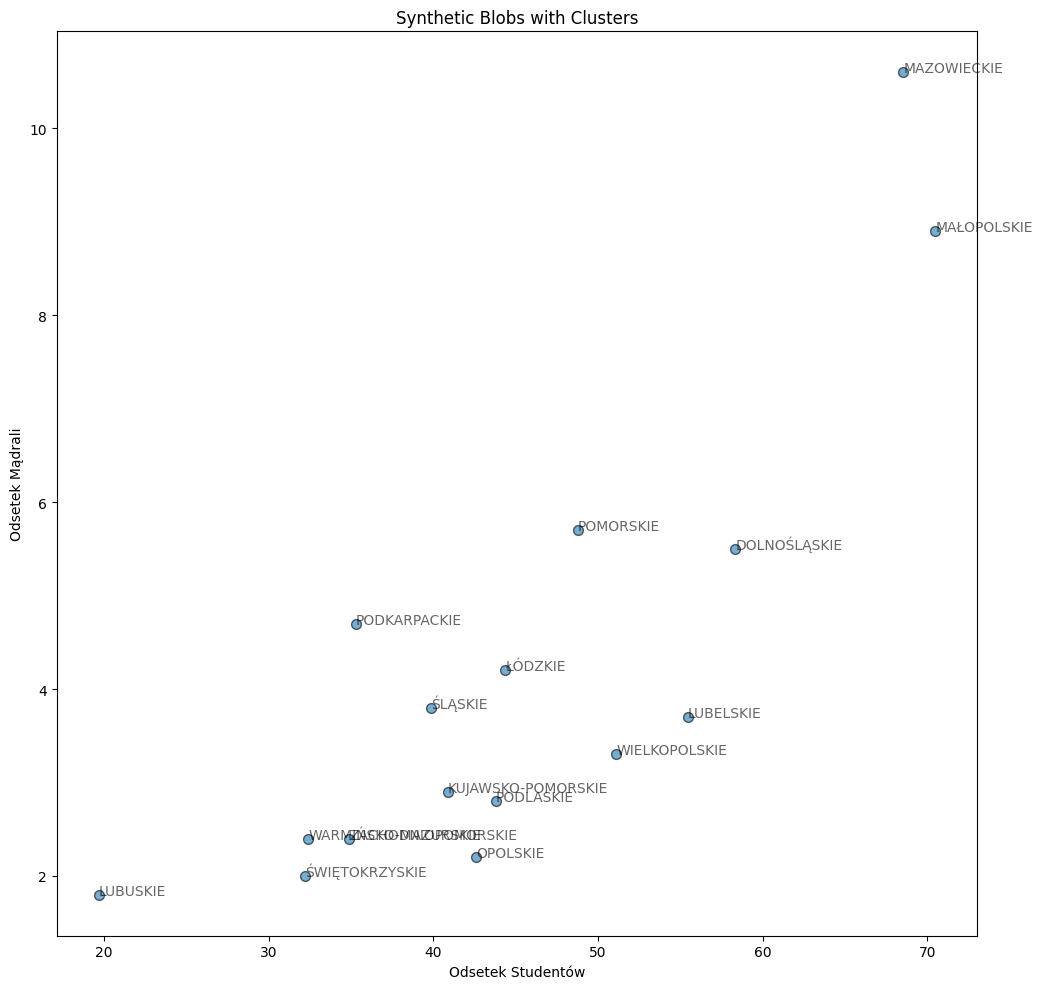

In [14]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)

# Scatter plot
plt.scatter(
    df_2014['Absolwenci_10_tys'],
    df_2014['Badacze'],
    s=50,
    alpha=0.6,
    edgecolor='k'
)

# Dodanie nazw województw jako etykiet
for i, row in df_2014.iterrows():
    plt.text(
        row['Absolwenci_10_tys'],
        row['Badacze'],
        row['Nazwa'],
        fontsize=10,
        alpha=0.6
    )

# Opisy osi i tytuł
plt.title('Synthetic Blobs with Clusters')
plt.xlabel('Odsetek Studentów')
plt.ylabel('Odsetek Mądrali')

plt.tight_layout()
plt.show()

Jeszcze jakies powymyslac wizualizacje i dla kazdego roku takie same porobic

In [15]:
reduced_df_2014['Rok'] = 2014
reduced_df_2018['Rok'] = 2018
reduced_df_2022['Rok'] = 2022

df_all = pd.concat([reduced_df_2014, reduced_df_2018, reduced_df_2022])

### Dwa przykładowe wykresy nam stykają

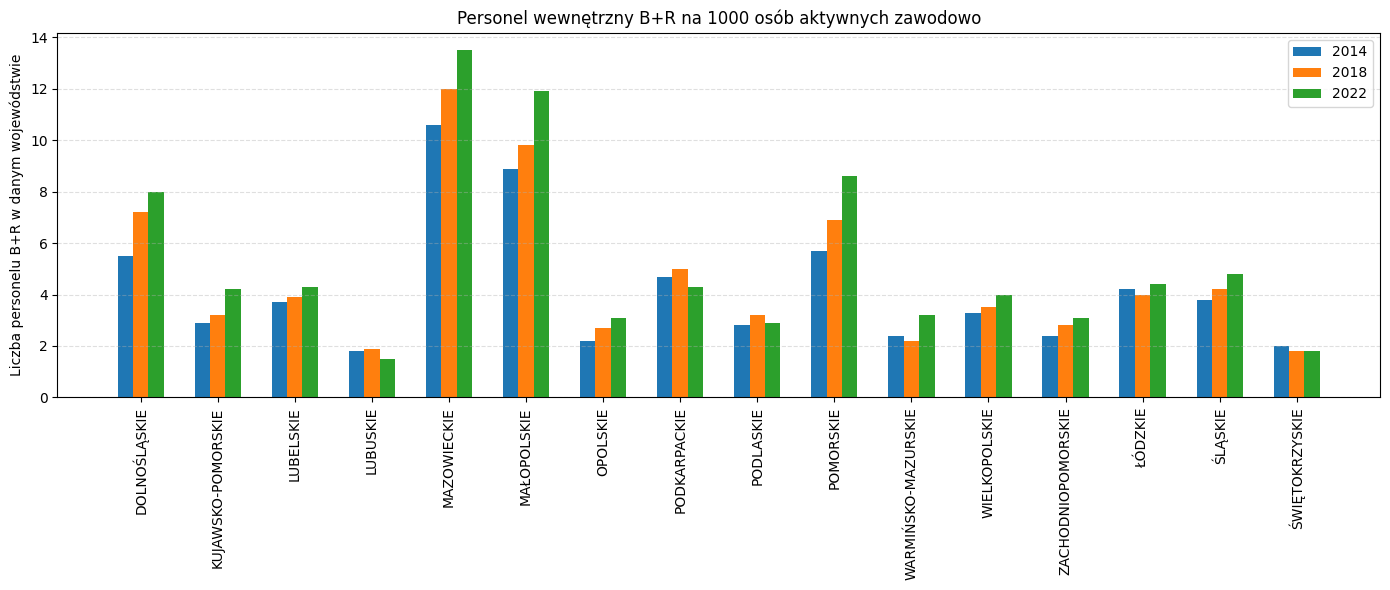

In [16]:
df_plot = df_all.groupby(['Nazwa', 'Rok'])['Badacze'].sum().unstack()

df_plot = df_plot.sort_index()  # uporządkuj alfabetycznie województwa

labels = df_plot.index
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(14, 6))

for i, year in enumerate(df_plot.columns):
    plt.bar(x + i * width, df_plot[year], width, label=f'{year}')

plt.xticks(x + width, labels, rotation=90)
plt.ylabel('Liczba personelu B+R w danym wojewódstwie')
plt.title('Personel wewnętrzny B+R na 1000 osób aktywnych zawodowo')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

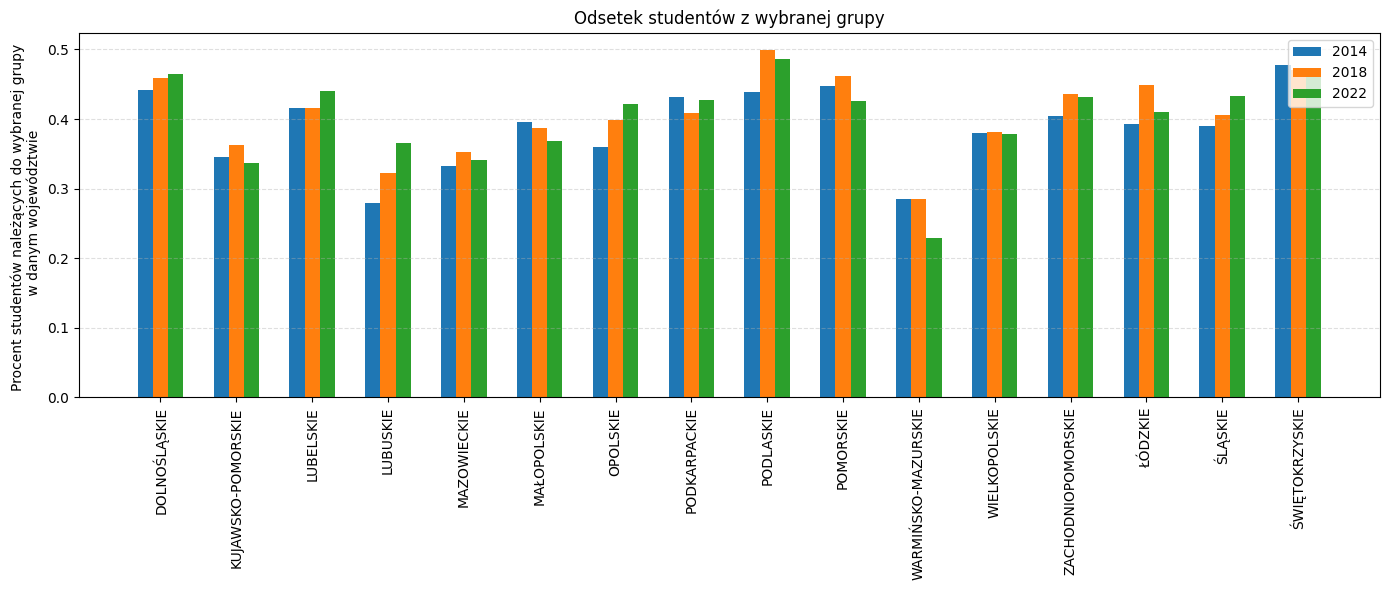

In [27]:
df_plot = df_all.groupby(['Nazwa', 'Rok'])['Odsetek_Studentów'].sum().unstack()

df_plot = df_plot.sort_index()  # uporządkuj alfabetycznie województwa

labels = df_plot.index
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(14, 6))

for i, year in enumerate(df_plot.columns):
    plt.bar(x + i * width, df_plot[year], width, label=f'{year}')

plt.xticks(x + width, labels, rotation=90)
plt.ylabel('Procent studentów należących do wybranej grupy \n w danym województwie')
plt.title('Odsetek studentów z wybranej grupy')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Braki danych i zmienne odstające

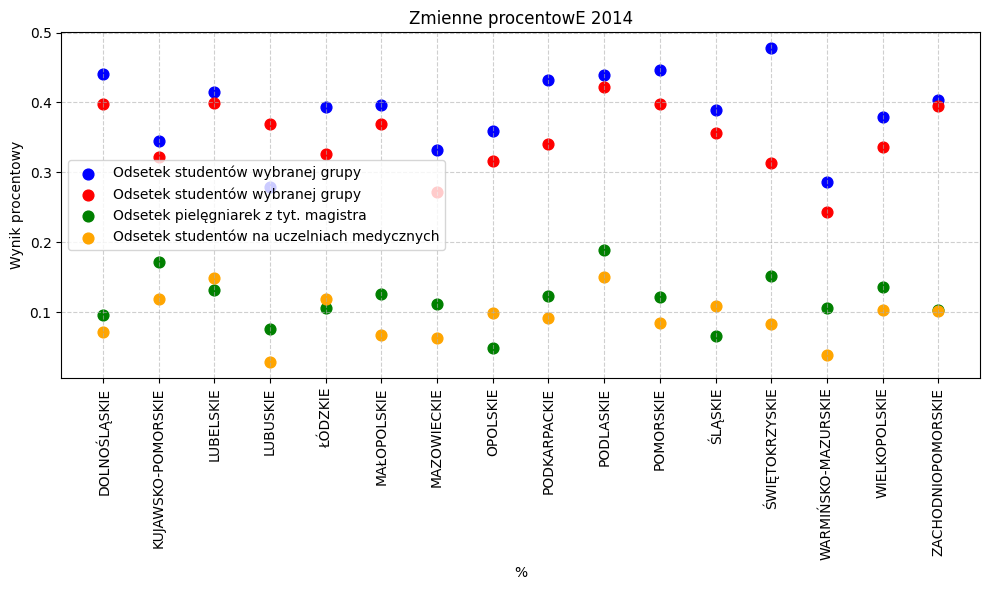

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Przykładowe dane
x = reduced_df_2014['Nazwa']
y1 = reduced_df_2014['Odsetek_Studentów']
y2 = reduced_df_2014['Odsetek_absolwentow']
y3 = reduced_df_2014['Odsetek_pielegniarek']
y4 = reduced_df_2014['Odsetek_studentów_medyczne']

plt.figure(figsize=(10, 6))
plt.scatter(x, y1, label='Odsetek studentów wybranej grupy', color='blue', s=60)
plt.scatter(x, y2, label='Odsetek studentów wybranej grupy', color='red', s=60)
plt.scatter(x, y3, label='Odsetek pielęgniarek z tyt. magistra', color='green', s=60)
plt.scatter(x, y4, label='Odsetek studentów na uczelniach medycznych', color='orange', s=60)

plt.xlabel('%')
plt.ylabel('Wynik procentowy')
plt.title('Zmienne procentowE 2014')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

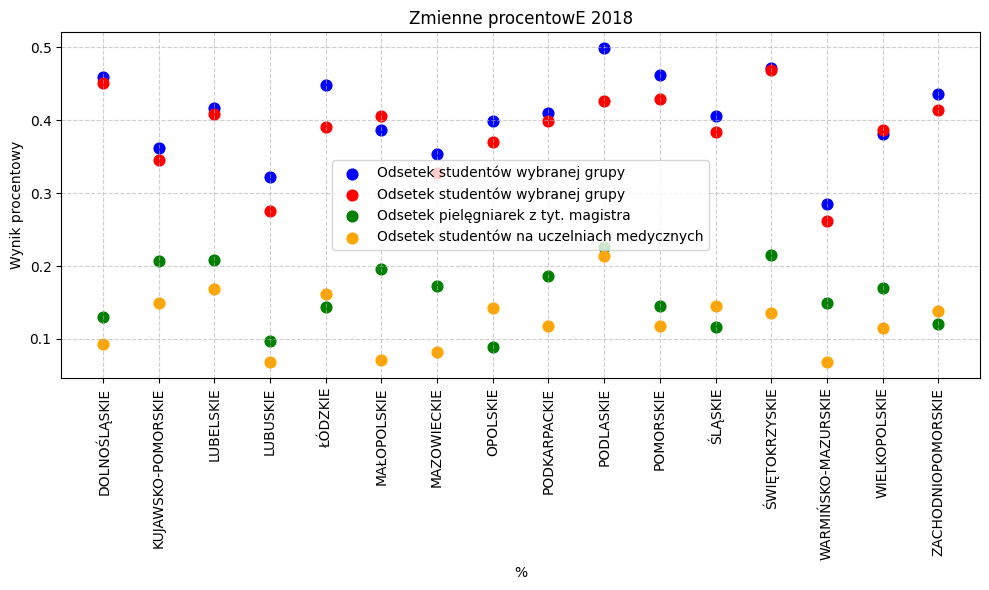

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Przykładowe dane
x = reduced_df_2018['Nazwa']
y1 = reduced_df_2018['Odsetek_Studentów']
y2 = reduced_df_2018['Odsetek_absolwentow']
y3 = reduced_df_2018['Odsetek_pielegniarek']
y4 = reduced_df_2018['Odsetek_studentów_medyczne']

plt.figure(figsize=(10, 6))
plt.scatter(x, y1, label='Odsetek studentów wybranej grupy', color='blue', s=60)
plt.scatter(x, y2, label='Odsetek studentów wybranej grupy', color='red', s=60)
plt.scatter(x, y3, label='Odsetek pielęgniarek z tyt. magistra', color='green', s=60)
plt.scatter(x, y4, label='Odsetek studentów na uczelniach medycznych', color='orange', s=60)

plt.xlabel('%')
plt.ylabel('Wynik procentowy')
plt.title('Zmienne procentowE 2018')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

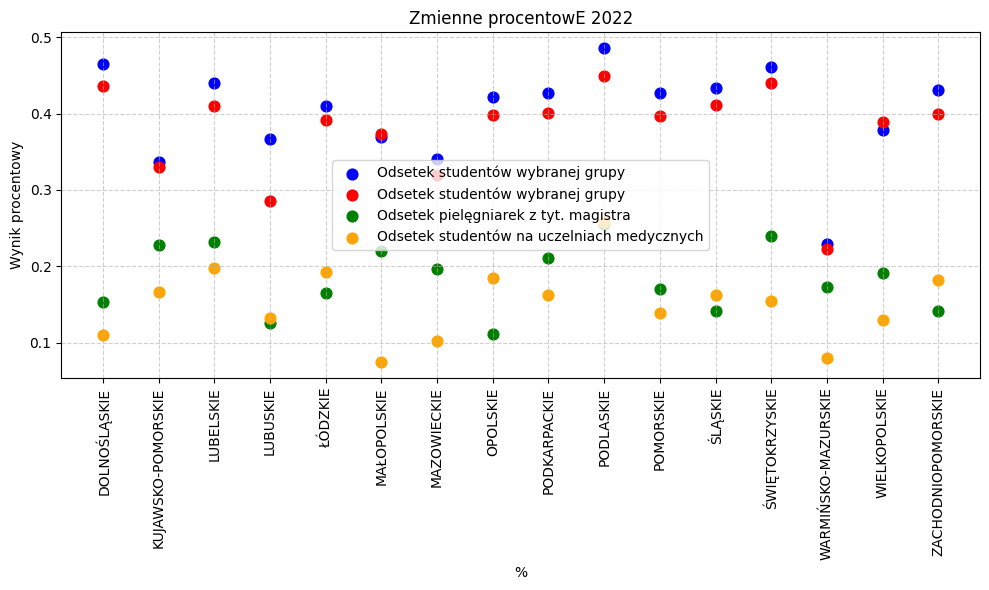

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Przykładowe dane
x = reduced_df_2022['Nazwa']
y1 = reduced_df_2022['Odsetek_Studentów']
y2 = reduced_df_2022['Odsetek_absolwentow']
y3 = reduced_df_2022['Odsetek_pielegniarek']
y4 = reduced_df_2022['Odsetek_studentów_medyczne']

plt.figure(figsize=(10, 6))
plt.scatter(x, y1, label='Odsetek studentów wybranej grupy', color='blue', s=60)
plt.scatter(x, y2, label='Odsetek studentów wybranej grupy', color='red', s=60)
plt.scatter(x, y3, label='Odsetek pielęgniarek z tyt. magistra', color='green', s=60)
plt.scatter(x, y4, label='Odsetek studentów na uczelniach medycznych', color='orange', s=60)

plt.xlabel('%')
plt.ylabel('Wynik procentowy')
plt.title('Zmienne procentowE 2022')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()